## 필요한 모듈

이 프로젝트를 위해서는 아래의 모듈이 필요하다. 

> numpy, pandas, matplotlib, astropy, version_information

### 모듈 설치

1. 콘솔 창에서 모듈을 설치할 때는 아래와 같은 형식으로 입력하면 된다.

>pip install module_name==version

>conda install module_name==version

2. 주피터 노트북(코랩 포함)에 설치 할 때는 아래의 셀을 실행해서 실행되지 않은 모듈을 설치할 수 있다. (pip 기준) 만약 아나콘다 환경을 사용한다면 7행을 콘다 설치 명령어에 맞게 수정하면 된다.

In [10]:
# Install a pip package in the current Jupyter kernel
import importlib, sys, subprocess
print(f"sys.executable: {sys.executable}")

packages = "numpy, pandas, matplotlib, scipy, astropy, photutils, ccdproc, version_information" # required modules
pkgs = packages.split(", ")
for pkg in pkgs :
    if not importlib.util.find_spec(pkg):
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg, '-q'])
        print(f"**** {pkg} module is now installed.")
    else: 
        print(f"******** {pkg} module is already installed.")
%load_ext version_information
import time
now = time.strftime("%Y-%m-%d %H:%M:%S (%Z = GMT%z)")
print(f"This notebook was generated at {now} ")

vv = %version_information {packages}
for i, pkg in enumerate(vv.packages):
    print(f"{i} {pkg[0]:10s} {pkg[1]:s}")


sys.executable: /home/guitar79/anaconda3/envs/astro_Python_env/bin/python
******** numpy module is already installed.
******** pandas module is already installed.
******** matplotlib module is already installed.
******** scipy module is already installed.
******** astropy module is already installed.
******** photutils module is already installed.
******** ccdproc module is already installed.
******** version_information module is already installed.
The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information
This notebook was generated at 2024-10-08 13:58:57 (KST = GMT+0900) 
0 Python     3.12.4 64bit [GCC 11.2.0]
1 IPython    8.27.0
2 OS         Linux 6.8.0 45 generic x86_64 with glibc2.39
3 numpy      1.26.4
4 pandas     2.2.2
5 matplotlib 3.9.2
6 scipy      1.14.1
7 astropy    6.1.0
8 photutils  1.12.0
9 ccdproc    2.4.2
10 version_information 1.0.4


### 모듈 버전 확인

아래 셀을 실행하면 이 노트북을 실행한 파이썬 및 관련 모듈의 버전을 확인할 수 있다.

### import modules

In [11]:
from glob import glob
from pathlib import Path
import os
import numpy as np
import astropy.units as u

from astropy.io import fits
from astropy.modeling.polynomial import Polynomial1D
from astropy.modeling.models import Gaussian1D, Linear1D
from astropy.modeling.fitting import LinearLSQFitter, LevMarLSQFitter
# astroquery provides an interface to the NIST atomic line database
from astroquery.nist import Nist

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import ysfitsutilpy as yfu
#import ysphotutilpy as ypu
#import ysvisutilpy as yvu

import _astro_utilities
import _Python_utilities

## 폴더 찾기

* MASTERDIR : "CAL-BDF"의 문자열을 가진 폴더를 찾는다. Bias, Dark, Flat 이미지가 들어 있고, 메디안 합성한 master file을 저장한다.
* BDFDIR : "SPTR-CAL_"의 문자열을 가진 폴더를 찾는다. 레퍼런스 전등을 찍은 이미지가 들어 있다. 
* DOINGDIRs : 스펙트럼을 촬영한 폴더들이 list로 들어 있다.

In [12]:
#%%
#######################################################
BASEDIR = Path("/mnt/Rdata/OBS_data")  

# PROJECDIR = BASEDIR / "C1-Variable"
# TODODIR = PROJECDIR / "-_-_-_2016-_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2017-01_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2017-03_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2017-05_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2017-06_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2021-10_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2022-01_-_RiLA600_STX-16803_-_2bin"

# PROJECDIR = BASEDIR / "C2-Asteroid"
# TODODIR = PROJECDIR / "-_-_-_2022-_-_GSON300_STF-8300M_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2022-_-_RiLA600_STX-16803_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2022-_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2023-_-_GSON300_STF-8300M_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2023-_-_RiLA600_STX-16803_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2023-_-_RiLA600_STX-16803_-_2bin"

# PROJECDIR = BASEDIR / "C3-EXO"
# TODODIR = PROJECDIR / "-_-_-_2024-05_-_GSON300_STF-8300M_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2024-05_-_RiLA600_STX-16803_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2024-06_-_GSON300_STF-8300M_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2024-06_-_RiLA600_STX-16803_-_2bin"

PROJECDIR = BASEDIR / "C4-Spectra"
TODODIR = PROJECDIR / "-_-_-_2024-05_TEC140_ASI183MMPro_-_1bin"

DOINGDIRs = sorted(_Python_utilities.getFullnameListOfsubDirs(TODODIR))
print ("DOINGDIRs: ", format(DOINGDIRs))
print ("len(DOINGDIRs): ", format(len(DOINGDIRs)))

try : 
    BDFDIR = [x for x in DOINGDIRs if "CAL-BDF" in str(x)]
    print ("BDFDIR: ", format(BDFDIR))
    MASTERDIR = Path(BDFDIR[0]) / _astro_utilities.master_dir
    if not MASTERDIR.exists():
        os.makedirs("{}".format(str(MASTERDIR)))
        print("{} is created...".format(str(MASTERDIR)))
    print ("MASTERDIR: ", format(MASTERDIR))
except : 
    pass

DOINGDIRs = sorted([x for x in DOINGDIRs if "_LIGHT_" in str(x)])
# print ("DOINGDIRs: ", format(DOINGDIRs))
# print ("len(DOINGDIRs): ", format(len(DOINGDIRs)))

filter_str = 'SPTR-HIP91262-VEGA_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin'
DOINGDIRs = [x for x in DOINGDIRs if filter_str in x]
# remove = 'BIAS'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
# remove = 'DARK'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
# remove = 'FLAT'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
print ("DOINGDIRs: ", DOINGDIRs)
print ("len(DOINGDIRs): ", len(DOINGDIRs))

DOINGDIRs:  ['/mnt/Rdata/OBS_data/C4-Spectra/-_-_-_2024-05_TEC140_ASI183MMPro_-_1bin/-_CAL-BDF_-_2024-05-14_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/OBS_data/C4-Spectra/-_-_-_2024-05_TEC140_ASI183MMPro_-_1bin/SPTR-CAL_LIGHT_-_2024-05-14_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/OBS_data/C4-Spectra/-_-_-_2024-05_TEC140_ASI183MMPro_-_1bin/SPTR-HIP24608-CAPELA_LIGHT_-_2024-04-26_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/OBS_data/C4-Spectra/-_-_-_2024-05_TEC140_ASI183MMPro_-_1bin/SPTR-HIP27989-BETELGEUSE_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/OBS_data/C4-Spectra/-_-_-_2024-05_TEC140_ASI183MMPro_-_1bin/SPTR-HIP31681-ALHENA_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/OBS_data/C4-Spectra/-_-_-_2024-05_TEC140_ASI183MMPro_-_1bin/SPTR-HIP32246-MEBSUTA_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/OBS_data/C4-Spectra/-_-_-_2024-05_TEC140_ASI183MMPro_-_1bin/SPTR-HIP32349-SIRIUS_LIGHT_-_2024-04-26_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdat

## Set variables

In [13]:
#######################################################
ylow, yhigh = 1775, 1910 
wei_ylow, wei_yhigh = 1800, 1880
xhigh = 4200

# start by taking +/- 15 pixels
npixels_to_cut = 15
npixels = 20

guessed_wavelengths = [667.728, 640.2, 585.2]  # Ar, Ne, Ne
guessed_xvals = [600, 970, 1550]

# guessed_wavelengths = [763.511, 750.387, 727.294, 706.722, 696.543,
#                        667.728, 640.225, 614.306, 585.249, 
#                        476.487, 451.073, 420.067, 394.898
#                        ]  
guessed_wavelengths = [763.511, 750.387, 727.294, 
                       706.722, 696.543,
                       614.306, 585.249,
                       420.067, 394.989]
guessed_xvals = [1018, 1127, 1318, 
                 1482, 1560,
                 2200, 2420,
                 3770, 3965]

HBalmer = [656.279,	486.135, 434.0472, 410.1734, 397.0075] * u.nm

calfile_idx = 0
#######################################################

## Cal file Summary

In [14]:
# BDFDIR = Path(BDFDIR[0])
# print("BDFDIR", BDFDIR)

# summary_cal = yfu.make_summary(BDFDIR / "*.fit*")
# if summary_cal is not None : 
#     #print(summary)
#     print("len(summary_cal):", len(summary_cal))
#     print("summary_cal:", summary_cal)
#     #print(summary_cal["file"][0])

# fpath_cal = Path(summary_cal["file"][calfile_idx])
# fpath_cal = Path(summary_cal["file"][len(summary_cal["file"])-3])

## light Summary

In [15]:
for DOINGDIR in DOINGDIRs[:1] :
    DOINGDIR = Path(DOINGDIR)
    print("DOINGDIR", DOINGDIR)

    READINGDIR = DOINGDIR / "reduced"
    TRACERESULTDIR = DOINGDIR / f"{READINGDIR.parts[-1]}_trace"
    if not TRACERESULTDIR.exists() :
        os.mkdir(str(TRACERESULTDIR))
        print(f"{str(TRACERESULTDIR)} is created...")

    summary = yfu.make_summary(READINGDIR / "*.fit*")
    if summary is not None : 
        #print(summary)
        print("len(summary):", len(summary))
        print("summary:", summary)
        #print(summary["file"][0])

DOINGDIR /mnt/Rdata/OBS_data/C4-Spectra/-_-_-_2024-05_TEC140_ASI183MMPro_-_1bin/SPTR-HIP91262-VEGA_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin
All 51 keywords (guessed from /mnt/Rdata/OBS_data/C4-Spectra/-_-_-_2024-05_TEC140_ASI183MMPro_-_1bin/SPTR-HIP91262-VEGA_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin/reduced/SPTR-HIP91262-VEGA_LIGHT__2024-05-01-16-11-34_5sec_TEC140_ASI183MMPro_-20c_1bin.fit) will be loaded.
len(summary): 23
summary:                                                  file  filesize  SIMPLE  \
0   /mnt/Rdata/OBS_data/C4-Spectra/-_-_-_2024-05_T...  80732160    True   
1   /mnt/Rdata/OBS_data/C4-Spectra/-_-_-_2024-05_T...  80732160    True   
2   /mnt/Rdata/OBS_data/C4-Spectra/-_-_-_2024-05_T...  80732160    True   
3   /mnt/Rdata/OBS_data/C4-Spectra/-_-_-_2024-05_T...  80732160    True   
4   /mnt/Rdata/OBS_data/C4-Spectra/-_-_-_2024-05_T...  80732160    True   
5   /mnt/Rdata/OBS_data/C4-Spectra/-_-_-_2024-05_T...  80732160    True   
6   /mnt/Rdata/OBS_data/C4-

### 분광 자료 display



********************
Starting /mnt/Rdata/OBS_data/C4-Spectra/-_-_-_2024-05_TEC140_ASI183MMPro_-_1bin/SPTR-HIP91262-VEGA_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin/reduced/SPTR-HIP91262-VEGA_LIGHT__2024-05-01-16-11-34_5sec_TEC140_ASI183MMPro_-20c_1bin.fit


 [astropy.modeling.fitting]


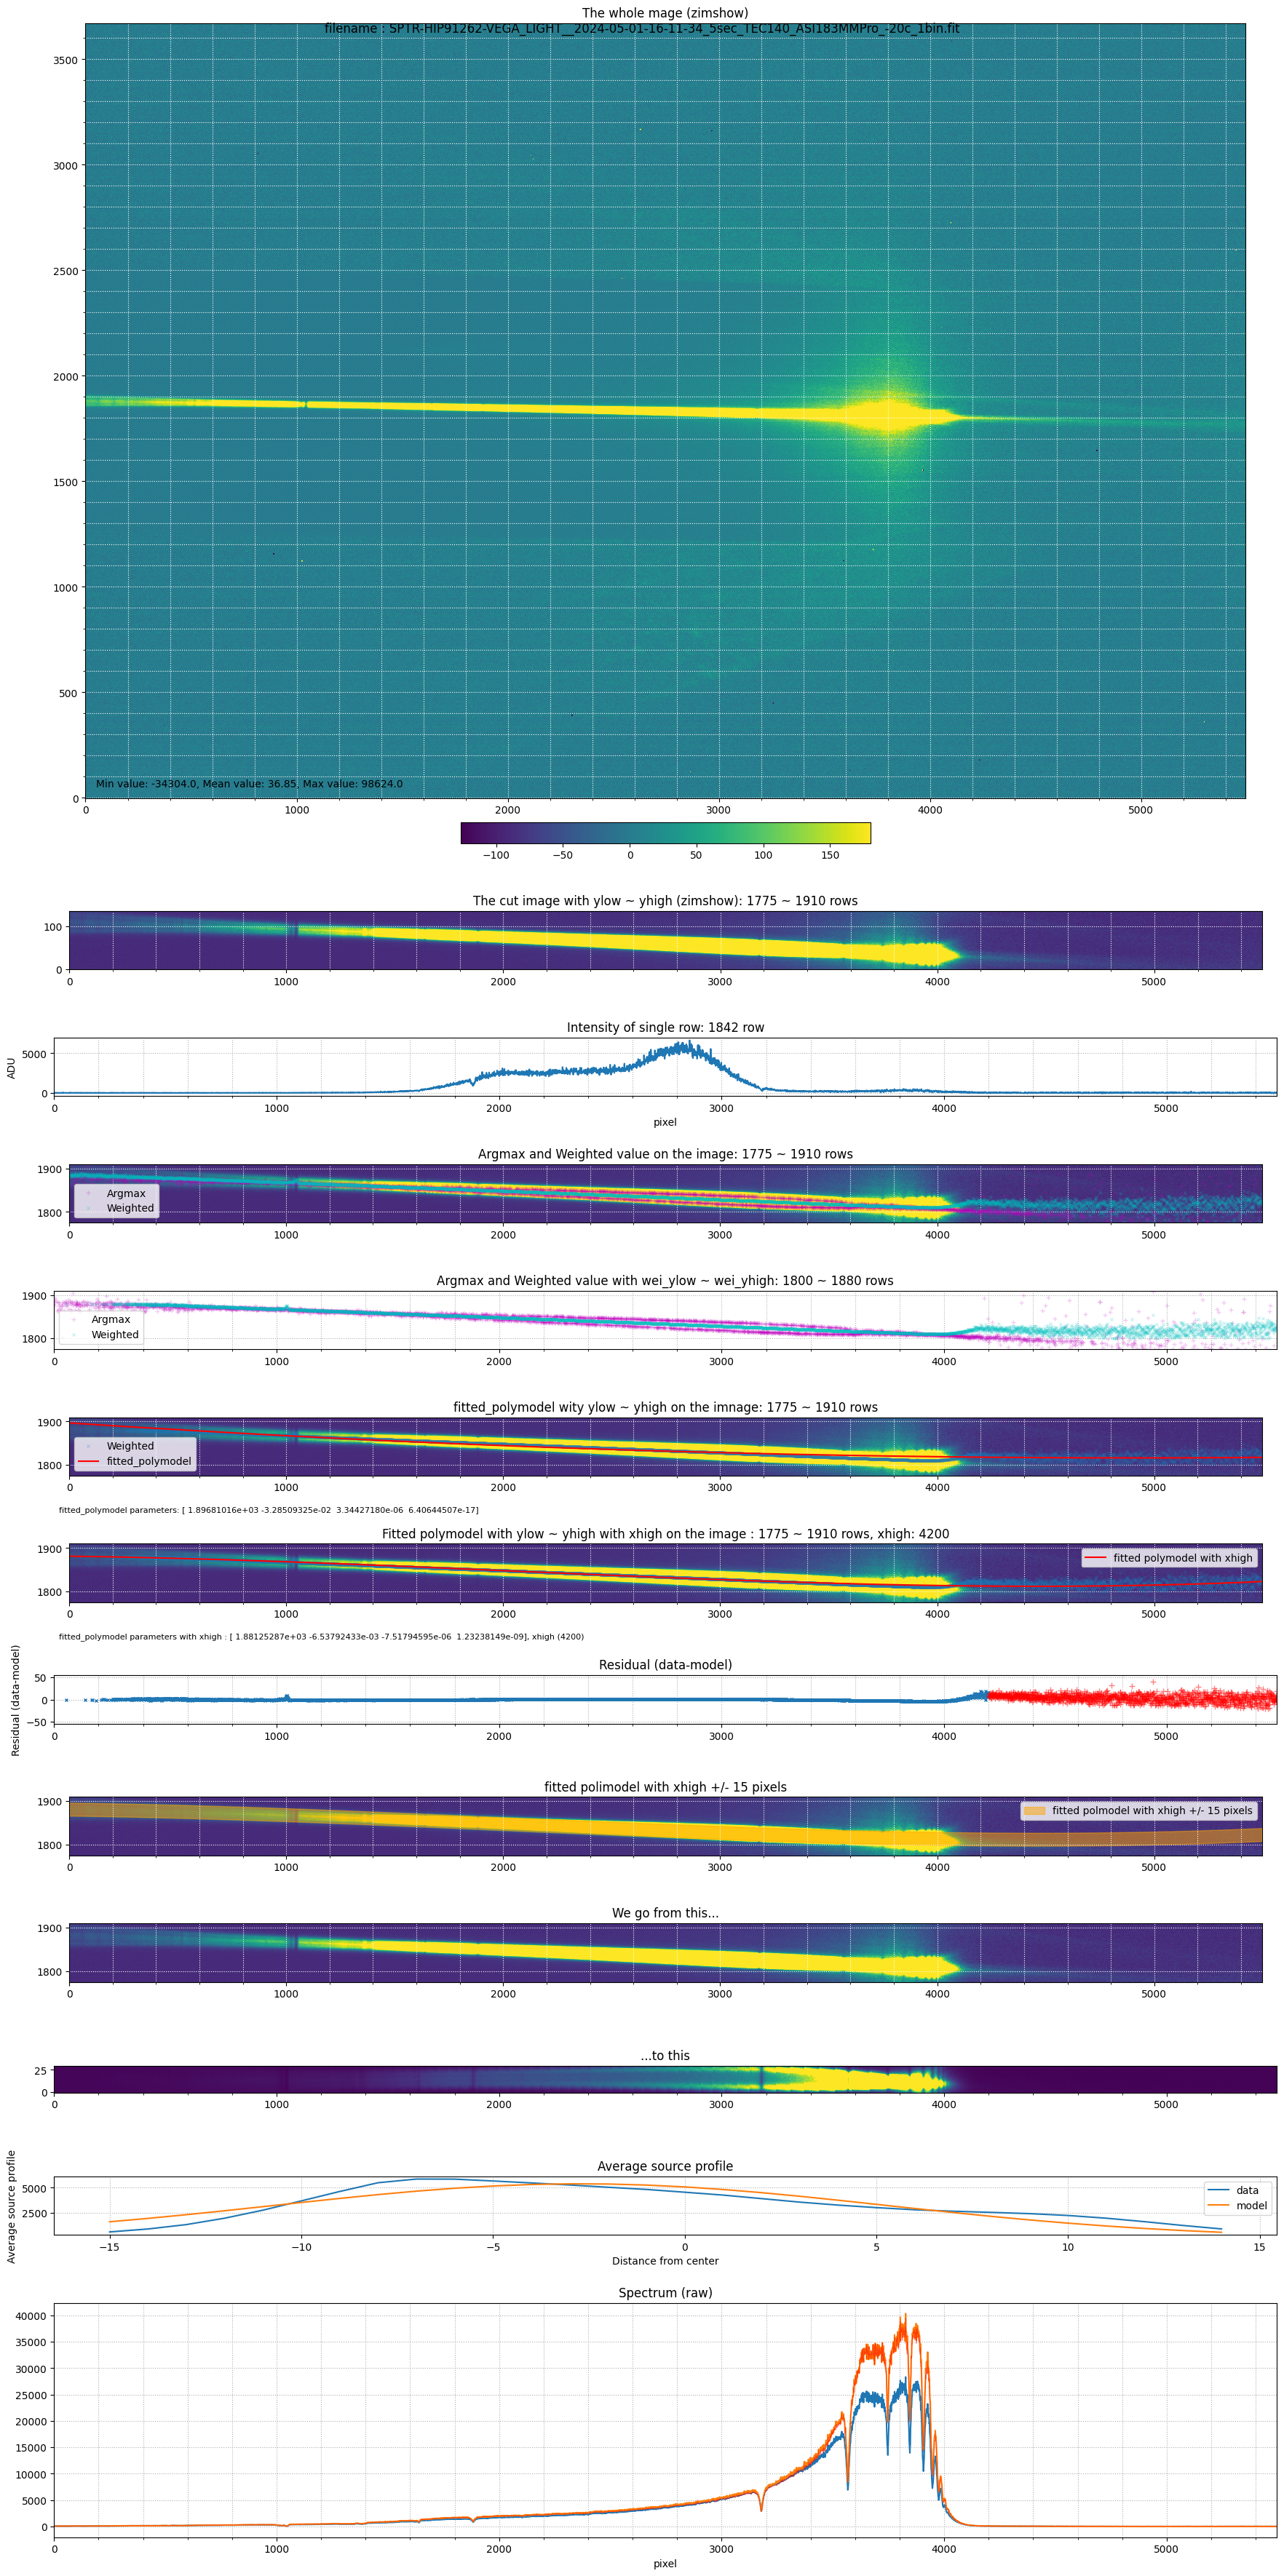

In [16]:
######################################################################################################
fpath = Path(summary["file"][0])
##여기에 처리하고자 하는 파일명 하나만 입력
# fpath = Path("/mnt/Rdata/OBS_data/C4-Spectra/-_-_-_2024-05_TEC140_ASI183MMPro_-_1bin/SPTR-HIP91262-VEGA_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin/reduced/SPTR-HIP91262-VEGA_LIGHT__2024-05-01-16-11-34_5sec_TEC140_ASI183MMPro_-20c_1bin.fit")
# fpath = Path("/mnt/Rdata/OBS_data/C4-Spectra/-_-_-_2024-05_TEC140_ASI183MMPro_-_1bin/SPTR-HIP91262-VEGA_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin/reduced/SPTR-HIP91262-VEGA_LIGHT__2024-05-01-16-11-34_5sec_TEC140_ASI183MMPro_-20c_1bin.fit")
print("*"*20)
print(f"Starting {fpath}")

hdul = fits.open(fpath)

##############################################################################
##############################################################################
##############################################
# ylow, yhigh = 1775, 1910 
##############################################
result = f"ylow:{ylow}\nyhigh:{yhigh}\n" 
result += f"wei_ylow:{wei_ylow}\nwei_yhigh:{wei_yhigh}\n"
result += f"xhigh:{xhigh}\n"
result += f"npixels_to_cut:{npixels_to_cut}\n"
result += f"npixels:{npixels}\n"
# result += f"calibration file:{fpath_cal}\n"
result += f"guessed_wavelengths:{guessed_wavelengths}\n"
result += f"guessed_xvals:{guessed_xvals}\n"

yvals = np.argmax(hdul[0].data, axis=0)
xvals = np.arange(hdul[0].data.shape[1])
bad_pixels = (yvals < ylow) | (yvals > yhigh)

fig, axs = plt.subplots(13, 1, figsize=(18, 36), 
                        sharex=False, sharey=False, 
                        gridspec_kw={'height_ratios': [14, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4]})

im0 = _astro_utilities.zimshow(axs[0], 
                    hdul[0].data,
                    origin="lower",
                    cmap = "viridis"
                    )
axs[0].xaxis.set_major_locator(ticker.AutoLocator())
axs[0].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[0].yaxis.set_major_locator(ticker.AutoLocator())
axs[0].yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[0].set_title('The whole mage (zimshow)')
axs[0].annotate(f"Min value: {hdul[0].data.min()}, Mean value: {hdul[0].data.mean():.02f}, Max value: {hdul[0].data.max()}", 
            xy=(15, 15), xycoords='axes pixels')
axs[0].grid(color='white', which='both', axis='both', ls='dotted')

##############################################################################
##############################################################################
im1 = _astro_utilities.zimshow(axs[1], 
                                hdul[0].data[ylow:yhigh, :],
                                origin="lower",
                                cmap = "viridis",
                                )
axs[1].set_title(f'The cut image with ylow ~ yhigh (zimshow): {ylow} ~ {yhigh} rows')
axs[1].xaxis.set_major_locator(ticker.AutoLocator())
axs[1].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[1].grid(color='white', which='both', axis='both', ls='dotted')

##############################################################################
##############################################################################
im2 = axs[2].plot(hdul[0].data[int((ylow+yhigh)/2),:])
axs[2].set_xlabel('pixel')
axs[2].set_ylabel('ADU')
axs[2].set_xlim((0,hdul[0].data.shape[1]))
axs[2].set_title(f'Intensity of single row: {int((ylow+yhigh)/2)} row')
axs[2].xaxis.set_major_locator(ticker.AutoLocator())
axs[2].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[2].grid(which='both', axis='both', ls='dotted')

##############################################################################
##############################################################################
# we use a cutout around the traced line, so the Y-values are from that cutout
# the `repeat` command here is used to extend our Y-axis position values, which are 425, 426, ... 475
# along the X-direction.  The indexing with [:, None] adds a "dummy" axis along the second (x) dimension,
# then `repeat` copies our Y-axis values.  The resulting array has the same shape as our weight array,
# which is hdul[0].data[425:475, :] minus the median
yaxis = np.repeat(np.arange(ylow, yhigh)[:,None],
                hdul[0].data.shape[1], axis=1)
background = np.median(hdul[0].data)
# moment 1 is the data-weighted average of the Y-axis coordinates
weighted_yaxis_values = np.average(yaxis, axis=0,
                                weights=hdul[0].data[ylow:yhigh,:] - background)
# print("weighted_yaxis_values ", weighted_yaxis_values)
# print("weighted_yaxis_values.shape :", weighted_yaxis_values.shape)

##############################################################################
##############################################################################
##############################################
# wei_ylow, wei_yhigh = 1800, 1880
##############################################

# we need to use the 'extent' keyword to have the axes correctly labeled
im3 = _astro_utilities.zimshow(axs[3], hdul[0].data[ylow:yhigh,:],
        extent=[0,hdul[0].data.shape[1],ylow,yhigh],
        origin="lower",
        cmap="viridis")
# plt.gca().set_aspect(10) # we stretch the image out by 10x in the y-direction
axs[3].plot(xvals[~bad_pixels], yvals[~bad_pixels], 'm+', label="Argmax", markersize=4, alpha=0.2)
axs[3].plot(xvals, weighted_yaxis_values, 'cx', label="Weighted", markersize=3, alpha=0.2)
axs[3].set_xlim((0,hdul[0].data.shape[1]))
axs[3].set_ylim((ylow,yhigh))
axs[3].set_title(f'Argmax and Weighted value on the image: {ylow} ~ {yhigh} rows')
axs[3].legend(loc='best');
axs[3].xaxis.set_major_locator(ticker.AutoLocator())
axs[3].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[3].grid(color='white', which='both', axis='both', ls='dotted')

##############################################################################
##############################################################################
bad_moments = (weighted_yaxis_values > wei_yhigh) | (weighted_yaxis_values < wei_ylow)

im4 = axs[4].plot(xvals[~bad_pixels], yvals[~bad_pixels], 'm+', label="Argmax", markersize=4, alpha=0.2)
axs[4].plot(xvals[~bad_moments], weighted_yaxis_values[~bad_moments], 'cx', label="Weighted", markersize=3, alpha=0.2)
axs[4].set_xlim((0,hdul[0].data.shape[1]))
axs[4].set_ylim((ylow,yhigh))
axs[4].set_title(f'Argmax and Weighted value with wei_ylow ~ wei_yhigh: {wei_ylow} ~ {wei_yhigh} rows')
axs[4].legend(loc='best')
axs[4].xaxis.set_major_locator(ticker.AutoLocator())
axs[4].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[4].grid(which='both', axis='both', ls='dotted')

##############################################################################
##############################################################################
polymodel = Polynomial1D(degree=3)
linfitter = LinearLSQFitter()

fitted_polymodel = linfitter(polymodel, xvals[~bad_moments], weighted_yaxis_values[~bad_moments])
fitted_polymodel

im5 = _astro_utilities.zimshow(axs[5], hdul[0].data[ylow:yhigh,:], 
        extent=[0,hdul[0].data.shape[1],ylow,yhigh],
        origin="lower",
        cmap="viridis")
axs[5].plot(xvals[~bad_moments], weighted_yaxis_values[~bad_moments], 'x', label="Weighted", markersize=3, alpha=0.2)
axs[5].plot(xvals, fitted_polymodel(xvals), color='r', label="fitted_polymodel");
axs[5].set_title(f'fitted_polymodel wity ylow ~ yhigh on the imnage: {ylow} ~ {yhigh} rows')
axs[5].annotate(f'fitted_polymodel parameters: {fitted_polymodel.parameters}', fontsize=8,
                        xy=(0, 0), xytext=(-10, -30), va='top', ha='left',
                        xycoords='axes fraction', textcoords='offset points')
axs[5].legend(loc='best')
axs[5].xaxis.set_major_locator(ticker.AutoLocator())
axs[5].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[5].grid(color='white', which='both', axis='both', ls='dotted')

##############################################################################
##############################################################################
#######################################
# xhigh = 4200
#######################################

fitted_polymodel = linfitter(polymodel, xvals[(~bad_moments) & (xvals < xhigh)],
                                weighted_yaxis_values[(~bad_moments) & (xvals < xhigh)])
fitted_polymodel

im6 = _astro_utilities.zimshow(axs[6], hdul[0].data[ylow:yhigh,:], extent=[0,hdul[0].data.shape[1],ylow,yhigh],
                origin="lower",
                cmap="viridis")
axs[6].plot(xvals[~bad_moments], weighted_yaxis_values[~bad_moments], 'x', markersize=3, alpha=0.25)
axs[6].plot(xvals, fitted_polymodel(xvals), color='r', label="fitted polymodel with xhigh");
axs[6].set_title(f'Fitted polymodel with ylow ~ yhigh with xhigh on the image : {ylow} ~ {yhigh} rows, xhigh: {xhigh}')
axs[6].axis((0,hdul[0].data.shape[1],ylow,yhigh));
axs[6].annotate(f'fitted_polymodel parameters with xhigh : {fitted_polymodel.parameters}, xhigh ({xhigh})', fontsize=8,
                        xy=(0, 0), xytext=(-10, -30), va='top', ha='left',
                        xycoords='axes fraction', textcoords='offset points')
axs[6].legend(loc='best')
axs[6].xaxis.set_major_locator(ticker.AutoLocator())
axs[6].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[6].grid(color='white', which='both', axis='both', ls='dotted')

##############################################################################
##############################################################################
im7 = axs[7].plot(xvals[~bad_moments & (xvals < xhigh)],
        weighted_yaxis_values[~bad_moments & (xvals < xhigh)] - fitted_polymodel(xvals[~bad_moments & (xvals < xhigh)]), 'x', markersize=3 )
axs[7].plot(xvals[~bad_moments & (xvals > xhigh)],
        weighted_yaxis_values[~bad_moments & (xvals > xhigh)] - fitted_polymodel(xvals[~bad_moments & (xvals > xhigh)]), 'r+', alpha=0.5)
axs[7].set_ylim(-55, 55)
axs[7].set_xlim((0,hdul[0].data.shape[1]))
axs[7].set_ylabel("Residual (data-model)");
axs[7].set_title(f'Residual (data-model)')
# axs[7].legend(loc='best')
axs[7].xaxis.set_major_locator(ticker.AutoLocator())
axs[7].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[7].grid(which='both', axis='both', ls='dotted')

##############################################################################
##############################################################################
# we need to use the 'extent' keyword to have the axes correctly labeled
#######################################
# start by taking +/- 15 pixels
# npixels_to_cut = 15
#######################################
im8 = _astro_utilities.zimshow(axs[8], hdul[0].data[ylow:yhigh,:], extent=[0,hdul[0].data.shape[1],ylow,yhigh],
        origin="lower")
axs[8].fill_between(xvals, fitted_polymodel(xvals)-npixels_to_cut,
                fitted_polymodel(xvals)+npixels_to_cut,
                color='orange', alpha=0.5, 
                label=f'fitted polmodel with xhigh +/- {npixels_to_cut} pixels')
axs[8].set_title(f'fitted polimodel with xhigh +/- {npixels_to_cut} pixels')
axs[8].set_xlim((0,hdul[0].data.shape[1]));
axs[8].set_ylim((ylow,yhigh));
axs[8].legend(loc='best')
axs[8].xaxis.set_major_locator(ticker.AutoLocator())
axs[8].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[8].grid(color='white', which='both', axis='both', ls='dotted')

##############################################################################
##############################################################################
trace_center = fitted_polymodel(xvals)
cutouts = np.array([hdul[0].data[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut, ii]
                        for yval, ii in zip(trace_center, xvals)])

im9 = _astro_utilities.zimshow(axs[9], hdul[0].data[ylow:yhigh,:], extent=[0,hdul[0].data.shape[1],ylow,yhigh],
        origin="lower", cmap="viridis")
axs[9].xaxis.set_major_locator(ticker.AutoLocator())
axs[9].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[9].grid(color='white', which='both', axis='both', ls='dotted')
axs[9].set_title("We go from this...")

##############################################################################
##############################################################################

im10 = _astro_utilities.zimshow(axs[10], cutouts.T, 
        origin="lower", cmap="viridis")
axs[10].set_xlim((0,hdul[0].data.shape[1]))
axs[10].xaxis.set_major_locator(ticker.AutoLocator())
axs[10].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[10].set_title("...to this")

##############################################################################
##############################################################################
mean_trace_profile = (cutouts - background).mean(axis=0)
trace_profile_xaxis = np.arange(-npixels_to_cut, npixels_to_cut)

lmfitter = LevMarLSQFitter()
guess = Gaussian1D(amplitude=mean_trace_profile.max(), mean=0, stddev=5)
fitted_trace_profile = lmfitter(model=guess, x=trace_profile_xaxis, y=mean_trace_profile)
model_trace_profile = fitted_trace_profile(trace_profile_xaxis)

im11 = axs[11].plot(trace_profile_xaxis, mean_trace_profile, label='data')
axs[11].plot(trace_profile_xaxis, model_trace_profile, label='model')
axs[11].legend(loc='best')
axs[11].set_xlabel("Distance from center")
axs[11].set_ylabel("Average source profile");
axs[11].set_title(f'Average source profile')
axs[11].grid(which='both', axis='both', ls='dotted')

##############################################################################
##############################################################################
average_spectrum = (cutouts - background).mean(axis=1)
trace_avg_spectrum = np.array([np.average(
        hdul[0].data[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut, ii] - background,
        weights=mean_trace_profile)
                                for yval, ii in zip(trace_center, xvals)])
gaussian_trace_avg_spectrum = np.array([np.average(
        hdul[0].data[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut, ii] - background,
        weights=model_trace_profile)
                                for yval, ii in zip(trace_center, xvals)])

im12 = axs[12].plot(average_spectrum, label="Direct Average")
axs[12].plot(trace_avg_spectrum, label='Trace-weighted average')
axs[12].plot(gaussian_trace_avg_spectrum, label='Gaussian-model-Trace-weighted average', alpha=0.5, linewidth=0.5, color='r')
axs[12].set_xlabel("pixel")
axs[12].set_xlim((0,hdul[0].data.shape[1]))
axs[12].xaxis.set_major_locator(ticker.AutoLocator())
axs[12].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[12].grid(which='both', axis='both', ls='dotted')
axs[12].set_title(f'Spectrum (raw)')

axs[1].set_aspect(2) # we stretch the image out by 10x in the y-direction 
axs[3].set_aspect(2) # we stretch the image out by 10x in the y-direction 
axs[5].set_aspect(2) # we stretch the image out by 10x in the y-direction 
axs[6].set_aspect(2) # we stretch the image out by 10x in the y-direction 
axs[7].set_aspect(2) # we stretch the image out by 10x in the y-direction 
axs[8].set_aspect(2) # we stretch the image out by 10x in the y-direction 
axs[9].set_aspect(2) # we stretch the image out by 10x in the y-direction 
axs[10].set_aspect(4) # we stretch the image out by 10x in the y-direction 

plt.suptitle(f'filename : {fpath.name}')

plt.colorbar(im0, fraction=0.025, pad=0.03, location='bottom')
plt.tight_layout(pad=2.0)
plt.savefig(f"{TRACERESULTDIR}/{fpath.stem}_spctrum_location.png")
                
plt.show()

# calibration with H-line

improved_xval_guesses : [1882.4690664218722, 3180.1655973414486, 3570.689969691552, 3746.5446430007323, 3844.446951039944]
linfit_wlmodel: Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
           slope            intercept    
    ------------------- -----------------
    -0.1320282046548019 905.1418886536015
wavelengths: [905.14188865 905.00986045 904.87783224 ... 179.91096048 179.77893228
 179.64690408] nm


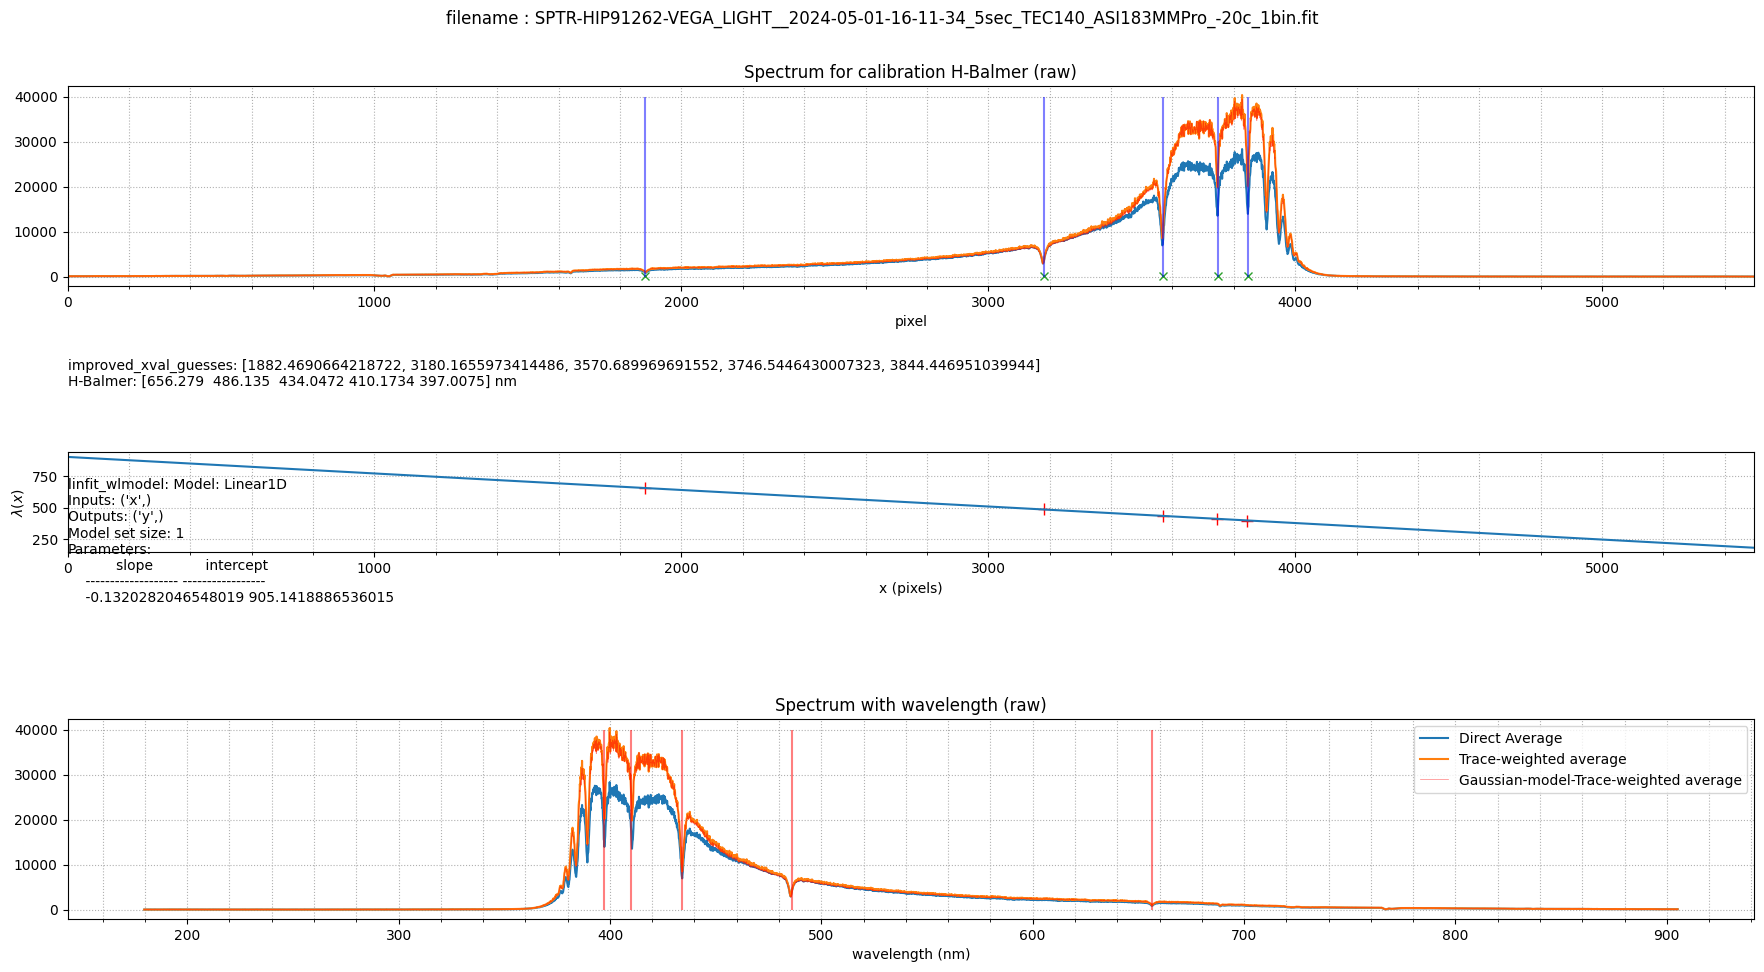

<class 'astropy.modeling.polynomial.Polynomial1D'>
Name: Polynomial1D
N_inputs: 1
N_outputs: 1
Fittable parameters: <property object at 0x75e3ae784630>
['__abstractmethods__', '__add__', '__and__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__or__', '__pow__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '_abc_impl', '_argnames', '_array_to_parameters', '_bounding_box', '_bounds', '_calculate_separability_matrix', '_check_param_broadcast', '_cov_matrix', '_default_domain_window', '_default_inputs_outputs', '_degree', '_domain', '_fix_inputs', '_fixed', '_format_repr', '_format_str', '_generate_coeff_names', '_generic_evaluate', '_get_renamed_

In [17]:

trace_model = fitted_polymodel
xaxis = np.arange(hdul[0].data.shape[1])
trace_center = trace_model(xaxis)
yaxis = np.arange(-npixels_to_cut, npixels_to_cut)

cutouts = np.array([hdul[0].data[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut, ii]
                        for yval, ii in zip(trace_center, xvals)])


HBalmer = [656.279,	486.135, 434.0472, 410.1734, 397.0075] * u.nm
guessed_xvals = [1883, 3180, 3570, 3747, 3845]

improved_xval_guesses = [np.average(xaxis[g-npixels:g+npixels],
                                    weights=average_spectrum[g-npixels:g+npixels] - np.median(average_spectrum))
                         for g in guessed_xvals]
print("improved_xval_guesses :", improved_xval_guesses)
result += f"improved_xval_guesses:{improved_xval_guesses}\n"


fig, axs = plt.subplots(3, 1, 
                        figsize=(18, 10), 
                        sharex=False, sharey=False, 
                        gridspec_kw={'height_ratios': [2, 1, 2]},
                        )

im0 = axs[0].plot(average_spectrum, label="Direct Average")
axs[0].plot(trace_avg_spectrum, label='Trace-weighted average')
axs[0].plot(gaussian_trace_avg_spectrum, label='Gaussian-model-Trace-weighted average', alpha=0.5, linewidth=0.5, color='r')
axs[0].set_xlabel("pixel")
axs[0].set_xlim((0,hdul[0].data.shape[1]))
axs[0].xaxis.set_major_locator(ticker.AutoLocator())
axs[0].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[0].grid(which='both', axis='both', ls='dotted')
axs[0].set_title(f'Spectrum (raw)')

axs[0].plot(guessed_xvals, [100]*len(guessed_xvals), 'x')
axs[0].vlines(guessed_xvals, 0, 40000, 'b', alpha=0.5)
axs[0].set_xlim((0,hdul[0].data.shape[1]))
axs[0].annotate(f"improved_xval_guesses: {improved_xval_guesses}\nH-Balmer: {HBalmer}", 
            xy=(0, -0.5), xycoords='axes fraction', #     xy=(0, -15), xycoords='axes pixels'
            )
axs[0].xaxis.set_major_locator(ticker.AutoLocator())
axs[0].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[0].set_title(f'Spectrum for calibration H-Balmer (raw)')

##############################################################################

linfitter = LinearLSQFitter()
wlmodel = Linear1D()
linfit_wlmodel = linfitter(model=wlmodel, x=improved_xval_guesses, y=HBalmer.value)
wavelengths = linfit_wlmodel(xaxis) * u.nm
print(f"linfit_wlmodel: {linfit_wlmodel}")
print(f"wavelengths: {wavelengths}")

minwave = wavelengths.min()
maxwave = wavelengths.max()

im1 = axs[1].plot(improved_xval_guesses, HBalmer, 'r+', markersize=8)
axs[1].plot(xaxis, wavelengths, '-')
axs[1].set_ylabel(r"$\lambda(x)$")
axs[1].set_xlabel(r"x (pixels)")
axs[1].set_xlim((0,hdul[0].data.shape[1]))
axs[1].xaxis.set_major_locator(ticker.AutoLocator())
axs[1].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[1].grid(which='both', axis='both', ls='dotted')

axs[1].annotate(f"linfit_wlmodel: {linfit_wlmodel}", 
            xy=(0, -0.5), xycoords='axes fraction', #     xy=(0, -15), xycoords='axes pixels'
            )

##############################################################################
im2 = axs[2].plot(wavelengths, average_spectrum, label="Direct Average")
axs[2].plot(wavelengths, trace_avg_spectrum, label='Trace-weighted average')
axs[2].plot(wavelengths, gaussian_trace_avg_spectrum, label='Gaussian-model-Trace-weighted average', alpha=0.5, linewidth=0.5, color='r')
axs[2].vlines(HBalmer, 0, 40000, 'r', alpha=0.5)
axs[2].set_title(f'Spectrum with wavelength (raw)')
axs[2].set_xlabel("wavelength (nm)")
axs[2].legend(loc='best')
axs[2].xaxis.set_major_locator(ticker.AutoLocator())
axs[2].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[2].grid(which='both', axis='both', ls='dotted')

plt.suptitle(f'filename : {fpath.name}')

plt.tight_layout(pad=2.0)
plt.savefig(f"{TRACERESULTDIR}/{fpath.stem}_calibration_using_HBalmer.png")
                
plt.show()

print(type(fitted_polymodel))
print(dir(fitted_polymodel))
result += f"fitted_polymodel.parameters:{fitted_polymodel.parameters}\n"
result += f"wavelengths(unit):{wavelengths.unit.to_string()}\n"
result += f"wavelengths:{wavelengths.value.tolist()}\n"
result += f"Direct average:{average_spectrum.tolist()}\n"
result += f"Trace-weighted average:{trace_avg_spectrum.tolist()}\n"
result += f"Gaussian-model-Trace-weighted average:{gaussian_trace_avg_spectrum.tolist()}\n"
# result += f"Direct average_cal:{average_spectrum.tolist()}\n"
# result += f"Trace-weighted average_cal:{trace_avg_spectrum.tolist()}\n"
# result += f"Gaussian-model-Trace-weighted average_cal:{gaussian_trace_avg_spectrum.tolist()}\n"

with open(f"{TRACERESULTDIR}/{fpath.stem}_spctrum_result_using_Hbalmer.txt", 'w') as f:
    f.write(result) 

In [18]:
HBalmer.value
print(wavelengths.value.tolist())

[905.1418886536015, 905.0098604489467, 904.8778322442919, 904.7458040396372, 904.6137758349823, 904.4817476303275, 904.3497194256727, 904.217691221018, 904.0856630163631, 903.9536348117083, 903.8216066070535, 903.6895784023988, 903.5575501977439, 903.4255219930891, 903.2934937884343, 903.1614655837795, 903.0294373791247, 902.8974091744699, 902.765380969815, 902.6333527651603, 902.5013245605055, 902.3692963558507, 902.2372681511958, 902.1052399465411, 901.9732117418863, 901.8411835372315, 901.7091553325766, 901.5771271279219, 901.4450989232671, 901.3130707186123, 901.1810425139574, 901.0490143093027, 900.9169861046479, 900.7849578999931, 900.6529296953382, 900.5209014906835, 900.3888732860287, 900.2568450813739, 900.124816876719, 899.9927886720643, 899.8607604674095, 899.7287322627546, 899.5967040580998, 899.4646758534451, 899.3326476487903, 899.2006194441354, 899.0685912394806, 898.9365630348259, 898.8045348301711, 898.6725066255162, 898.5404784208614, 898.4084502162067, 898.2764220115

In [19]:
import pandas as pd
df_VEGA = pd.read_csv("vega_response_fn.csv")
df_VEGA

Unnamed: 0     wavelength  calspec_vega   flux_avg   reaction_fn  \
0               0      90.045200  1.283795e-06        NaN           NaN   
1               1      90.135400  1.737430e-06        NaN           NaN   
2               2      90.225800  1.845712e-06        NaN           NaN   
3               3      90.316300  1.890829e-06        NaN           NaN   
4               4      90.406800  1.934306e-06        NaN           NaN   
...           ...            ...           ...        ...           ...   
14683       14683  298167.717169  1.371341e-08  78.843475  5.550220e-09   
14684       14684  298466.630654  1.365786e-08  78.843475  5.527736e-09   
14685       14685  298765.843799  1.360230e-08  78.843475  5.505253e-09   
14686       14686  299065.356906  1.353882e-08  78.843475  5.479557e-09   
14687       14687  299365.170275  1.338803e-08  78.843475  5.418531e-09   

       flux_avg_cal  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
...             ...  
14683  4.375986e-07  
14684  4.358259e-07  
14685  4.340533e-07  
14686  4.320273e-07  
14687  4.272158e-07  

[14688 rows x 6 columns]

In [ ]:
df_VEGA['reaction_fn']